<div style="width: 100%; margin: 0 auto;">
    <a href="https://github.com/e10101/learning-operations-research">
        <img src="../assets/banner.svg" alt="Learning Operations Research" style="width: 100%; height: auto; display: block;">
    </a>
</div>

# Traveling Salesman Problem (TSP) - Nearest Neighbor
---

[![Github](../assets/badges/github.svg)](https://github.com/e10101/learning-operations-research)
[![Bilibili](../assets/badges/bilibili.svg)](https://www.bilibili.com/video/BV14jRUYZEpn) 

Reference: https://www.youtube.com/watch?v=KURydVL0kGQ&list=PLKQ1MjSFuxKced-SxpwUSOCrXadMD-7yw&index=2

## Define Network

In [1]:
!pip install -q networkx


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import networkx as nx

In [3]:
n = 20
G = nx.complete_graph(n)

## Create Random Position of Nodes

In [5]:
import random

In [6]:
node_pos = {i: (random.random(), random.random()) for i in G.nodes}

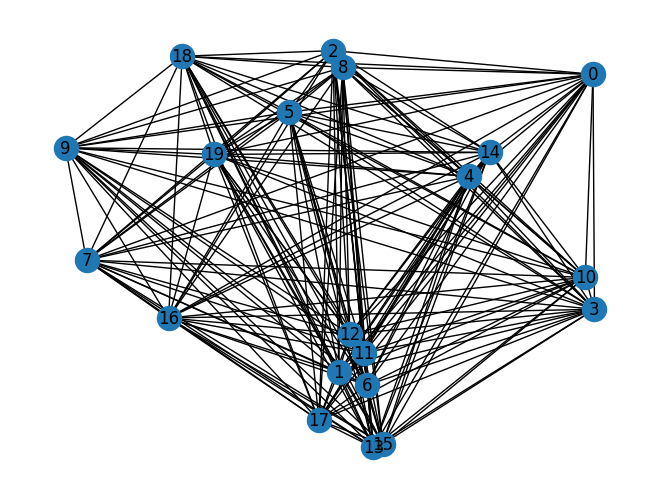

In [7]:
nx.draw(G, pos=node_pos, with_labels=True)

## Calculate Edge Distance

In [9]:
import math

def eucl_dist(x, y):
    return math.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2)

In [11]:
for i, j in G.edges:
    x = node_pos[i]
    y = node_pos[j]

    G.edges[i, j]['length'] = eucl_dist(x, y)

In [12]:
G.edges[(0, 1)]

{'length': 0.8105065076993874}

## Get Nearest Neighbor

In [14]:
# Using edges to get nearest ones

def nearest_neighbor_heuristic(G):
    visited_nodes = [0]
    
    while len(visited_nodes) < G.number_of_nodes():
        n = visited_nodes[-1]
        edges = G.edges(n)
    
        not_visited = [edge for edge in edges if edge[1] not in visited_nodes]
    
        if len(not_visited) > 0:
            sorted_list = sorted(not_visited, key=lambda x: G.edges[x]['length'], reverse=False)
        
            nested_node = sorted_list[0][1]
        
            visited_nodes.append(nested_node)

    return visited_nodes

In [15]:
# Using neighbors to get nearest ones
def nearest_neighbor_heuristic_v2(G):
        
    visited_nodes = [0]
    
    while len(visited_nodes) < G.number_of_nodes():
        # print(i)
        i = visited_nodes[-1]
        node_length_pairs = [(j, G.edges[i, j]['length']) for j in G.neighbors(i) if j not in visited_nodes ]
    
        if len(node_length_pairs) > 0:
            sorted_list = sorted(node_length_pairs, key=lambda p: p[1])
        
            nested_node = sorted_list[0][0]
        
            visited_nodes.append(nested_node)

    return visited_nodes

In [16]:
print(nearest_neighbor_heuristic(G))
print(nearest_neighbor_heuristic_v2(G))

[0, 14, 4, 10, 3, 11, 12, 1, 6, 17, 13, 15, 16, 7, 9, 19, 5, 8, 2, 18]
[0, 14, 4, 10, 3, 11, 12, 1, 6, 17, 13, 15, 16, 7, 9, 19, 5, 8, 2, 18]


In [17]:
tour = nearest_neighbor_heuristic_v2(G)

In [18]:
tour_edges = [(tour[i-1], tour[i]) for i in range(G.number_of_nodes())]

In [19]:
tour_edges

[(18, 0),
 (0, 14),
 (14, 4),
 (4, 10),
 (10, 3),
 (3, 11),
 (11, 12),
 (12, 1),
 (1, 6),
 (6, 17),
 (17, 13),
 (13, 15),
 (15, 16),
 (16, 7),
 (7, 9),
 (9, 19),
 (19, 5),
 (5, 8),
 (8, 2),
 (2, 18)]

## Result Plot

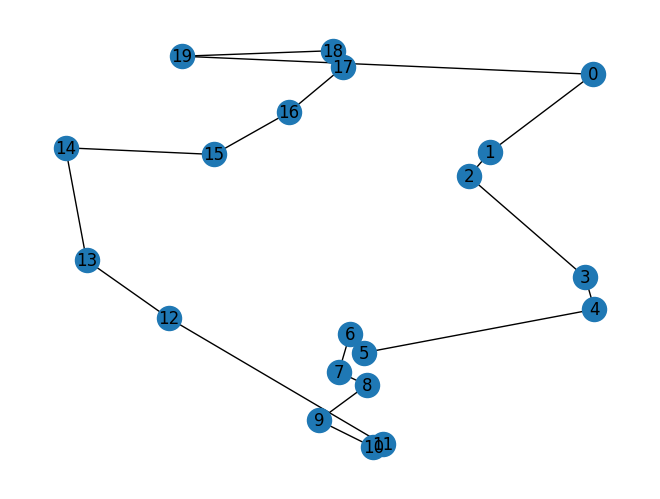

In [20]:
nx.draw(G.edge_subgraph(tour_edges), pos=node_pos, with_labels=True, labels={ n: i for n, i in zip(tour, range(G.number_of_nodes()))})